In [ ]:
import pandas as pd
import numpy as np
!pip install faker

from faker import Faker

# Initialize the Faker library
fake = Faker()

# Define possible values for certain columns
locations = ['near lake', 'Forest Edge', 'Grassland', 'Forest Area', 'In lake']
behaviors = ['Sleeping', 'Angry', 'Eating']
weather_conditions = ['Clear', 'Cloudy', 'Rain', 'Windy']

# Set the date range
start_date = pd.to_datetime('2024-01-01')
end_date = pd.to_datetime('2024-05-01')

# Generate data with balanced behavior distribution
data = []
for behavior in behaviors:
    for _ in range(1667):  # Ensure equal representation of each behavior
        date = fake.date_between(start_date=start_date, end_date=end_date)
        time_start = fake.time(pattern='%H:%M', end_datetime=None)
        time_end = fake.time(pattern='%H:%M', end_datetime=None)
        if time_start > time_end:  # Ensure time_end is after time_start
            time_start, time_end = time_end, time_start
        location = np.random.choice(locations)
        elephant_id = f"E{np.random.randint(1, 30):03}"  # 30 unique elephants

        if behavior == 'Sleeping':
            duration = round(np.random.uniform(2, 9.0), 1)  # Sleep duration between 2 and 6 hours
            food_type = 'No'  # Not applicable
            heart_rate = np.random.randint(90, 140)
            is_sleeping = 'Yes'
        elif behavior == 'Angry':
            duration = round(np.random.uniform(0.1, 2.9), 1)  # Anger duration between 1 and 2 hours
            food_type = 'No'  # Not applicable
            heart_rate = np.random.randint(120, 151)  # Heart rate between 120 and 150 BPM when angry
            is_sleeping = 'No'
        else:  # Eating
            duration = round(np.random.uniform(0.1, 18), 1)  # Eating duration between 14 and 18 hours
            food_type = 'Yes'
            heart_rate = np.random.randint(80, 111)  # Heart rate between 80 and 110 BPM when eating
            is_sleeping = 'No'

        weather_condition = np.random.choice(weather_conditions)

        data.append([date, time_start, time_end, location, elephant_id, behavior, duration, food_type, heart_rate, weather_condition, is_sleeping])

# Additional entries to make up 5000 rows
for _ in range(499):
    date = fake.date_between(start_date=start_date, end_date=end_date)
    time_start = fake.time(pattern='%H:%M', end_datetime=None)
    time_end = fake.time(pattern='%H:%M', end_datetime=None)
    if time_start > time_end:  # Ensure time_end is after time_start
        time_start, time_end = time_end, time_start
    location = np.random.choice(locations)
    elephant_id = f"E{np.random.randint(1, 30):03}"  # 30 unique elephants
    behavior = np.random.choice(behaviors)

    if behavior == 'Sleeping':
        duration = round(np.random.uniform(2, 6.0), 1)  # Sleep duration between 2 and 6 hours
        food_type = 'No'  # Not applicable
        heart_rate = np.random.randint(90, 130)
        is_sleeping = 'Yes'
    elif behavior == 'Angry':
        duration = round(np.random.uniform(1, 2.0), 1)  # Anger duration between 1 and 2 hours
        food_type = 'No'  # Not applicable
        heart_rate = np.random.randint(120, 151)  # Heart rate between 120 and 150 BPM when angry
        is_sleeping = 'No'
    else:  # Eating
        duration = round(np.random.uniform(14, 18), 1)  # Eating duration between 14 and 18 hours
        food_type = 'Yes'
        heart_rate = np.random.randint(80, 111)  # Heart rate between 80 and 110 BPM when eating
        is_sleeping = 'No'

    weather_condition = np.random.choice(weather_conditions)

    data.append([date, time_start, time_end, location, elephant_id, behavior, duration, food_type, heart_rate, weather_condition, is_sleeping])

# Create DataFrame
df = pd.DataFrame(data, columns=['Date', 'Time_Start', 'Time_End', 'Location', 'Elephant_ID', 'Behavior', 'Duration', 'Food_Type', 'Heart_Rate', 'Weather_Condition', 'Is_Sleeping'])

# Sort DataFrame by date
df.sort_values(by='Date', inplace=True)

# Save DataFrame to CSV
df.to_csv('e16.csv', index=False)

df.head()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.3 MB/s eta 0:00:00


,Date,Time_Start,Time_End,Location,Elephant_ID,Behavior,Duration,Food_Type,Heart_Rate,Weather_Condition,Is_Sleeping
4600,2024-01-01,03:17,06:58,In lake,E019,Eating,16.8,Yes,82,Windy,No
3717,2024-01-01,01:21,20:53,In lake,E024,Eating,8.2,Yes,89,Clear,No
3721,2024-01-01,10:27,23:47,Grassland,E022,Eating,0.7,Yes,91,Windy,No
5010,2024-01-01,05:58,19:48,Forest Area,E001,Sleeping,3.6,No,92,Windy,Yes
3016,2024-01-01,02:24,20:51,Grassland,E021,Angry,1.0,No,131,Windy,No


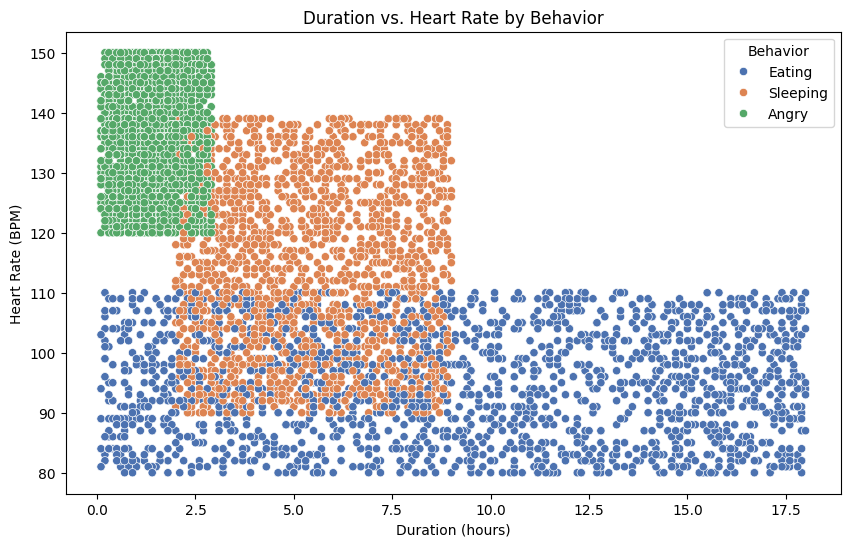

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the data from the CSV
df = pd.read_csv('e16.csv')

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Duration', y='Heart_Rate', hue='Behavior', palette='deep')

# Set the plot title and labels
plt.title('Duration vs. Heart Rate by Behavior')
plt.xlabel('Duration (hours)')
plt.ylabel('Heart Rate (BPM)')

# Show the plot
plt.legend(title='Behavior')
plt.show()


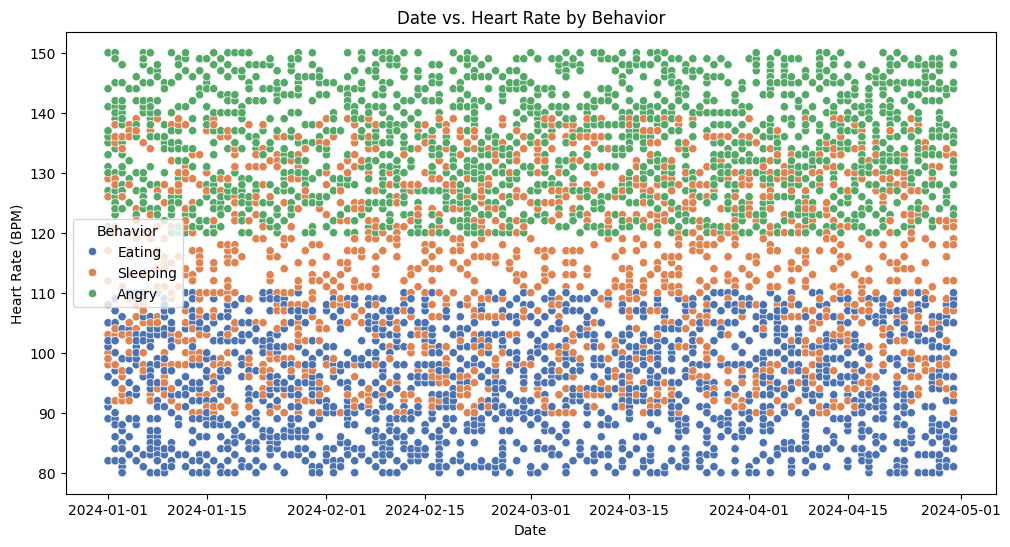

In [ ]:
import matplotlib.pyplot as plt
!pip install seaborn matplotlib

import seaborn as sns

# Load the data from the CSV
df = pd.read_csv('e16.csv')

# Convert 'Date' to datetime format for proper plotting
df['Date'] = pd.to_datetime(df['Date'])

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Date', y='Heart_Rate', hue='Behavior', palette='deep')

# Set the plot title and labels
plt.title('Date vs. Heart Rate by Behavior')
plt.xlabel('Date')
plt.ylabel('Heart Rate (BPM)')

# Show the plot
plt.legend(title='Behavior')
plt.show()


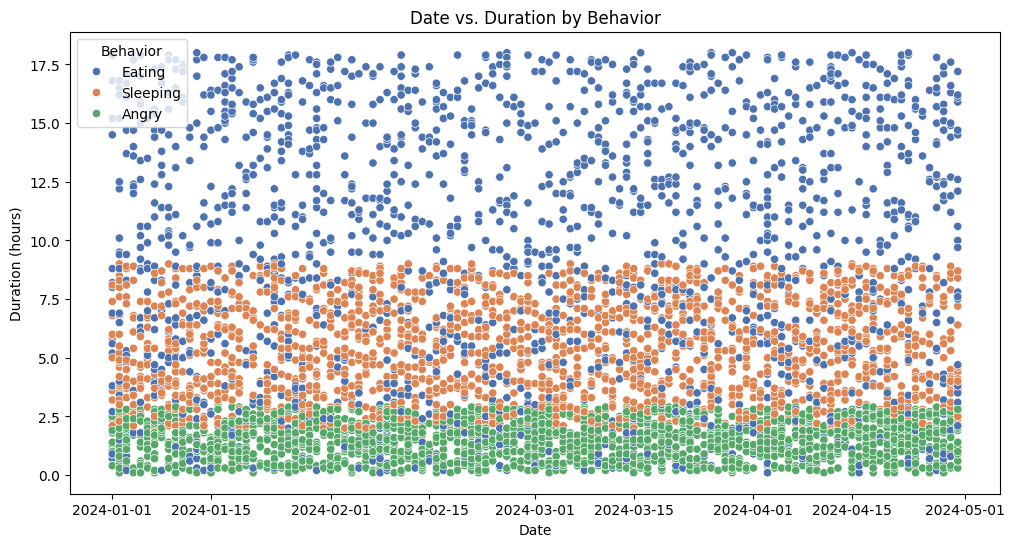

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV
df = pd.read_csv('e16.csv')

# Convert 'Date' to datetime format for proper plotting
df['Date'] = pd.to_datetime(df['Date'])

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Date', y='Duration', hue='Behavior', palette='deep')

# Set the plot title and labels
plt.title('Date vs. Duration by Behavior')
plt.xlabel('Date')
plt.ylabel('Duration (hours)')

# Show the plot
plt.legend(title='Behavior')
plt.show()


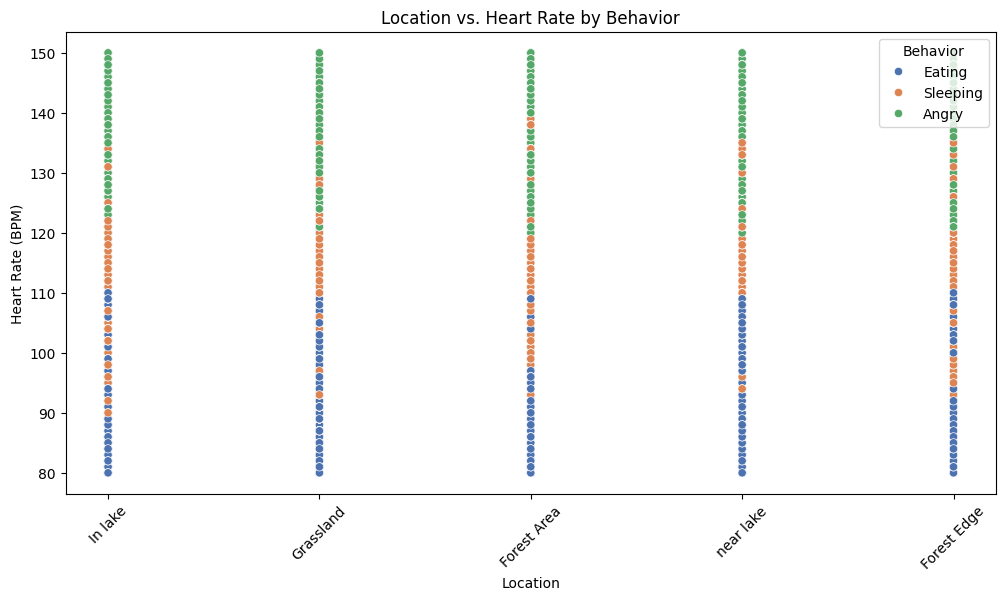

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV
df = pd.read_csv('e16.csv')

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Location', y='Heart_Rate', hue='Behavior', palette='deep')

# Set the plot title and labels
plt.title('Location vs. Heart Rate by Behavior')
plt.xlabel('Location')
plt.ylabel('Heart Rate (BPM)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.legend(title='Behavior')
plt.show()


<ipython-input-6-d774e7a0b0fa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Behavior', y='Duration', palette='deep')


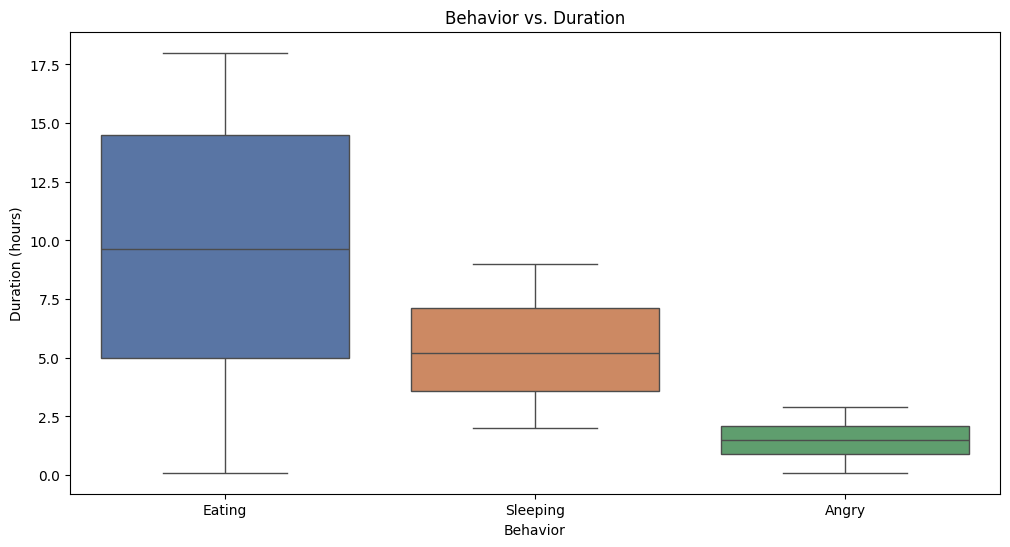

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Behavior', y='Duration', palette='deep')

# Set the plot title and labels
plt.title('Behavior vs. Duration')
plt.xlabel('Behavior')
plt.ylabel('Duration (hours)')

# Show the plot
plt.show()


<ipython-input-7-81a52db69a37>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Weather_Condition', y='Heart_Rate', palette='deep')


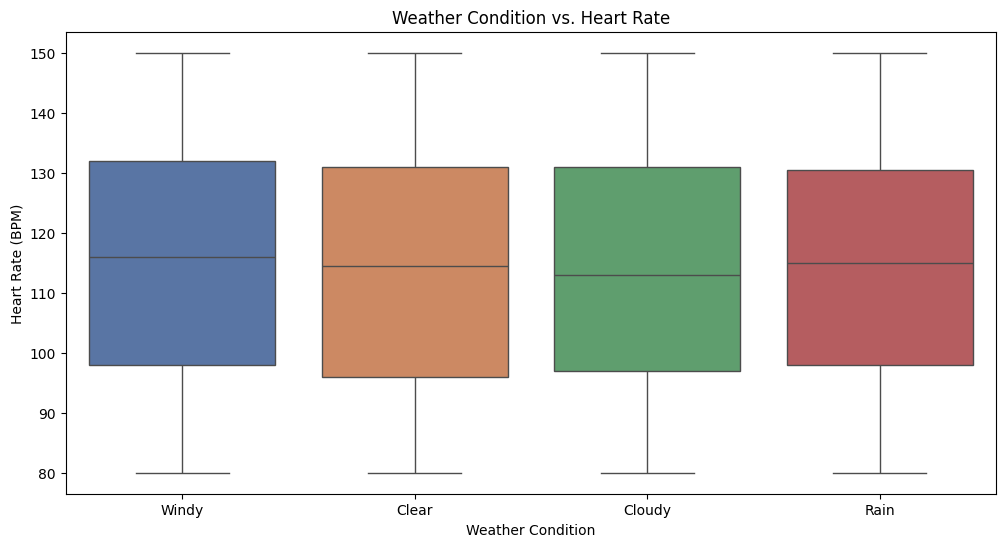

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Weather_Condition', y='Heart_Rate', palette='deep')

# Set the plot title and labels
plt.title('Weather Condition vs. Heart Rate')
plt.xlabel('Weather Condition')
plt.ylabel('Heart Rate (BPM)')

# Show the plot
plt.show()


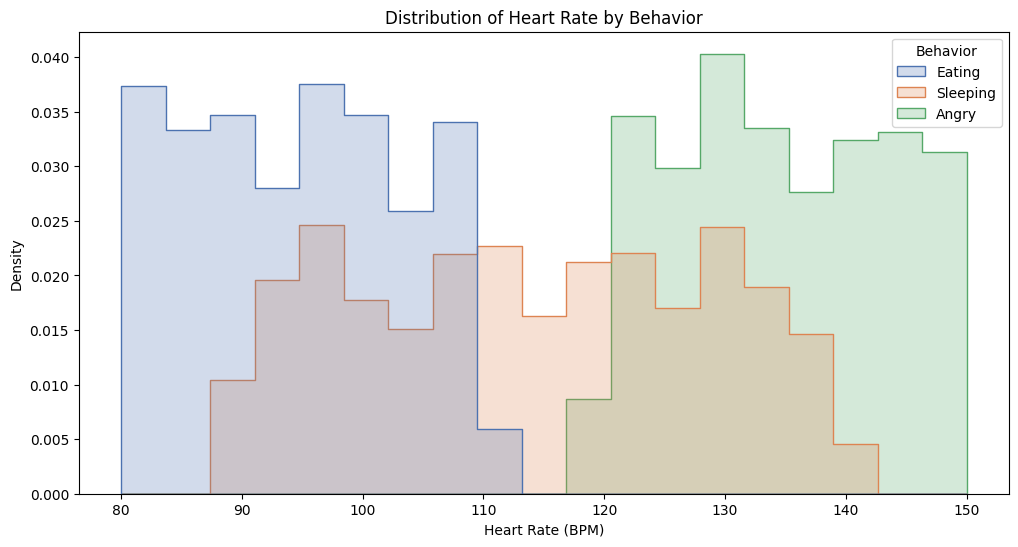

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Heart_Rate', hue='Behavior', element='step', stat='density', common_norm=False, palette='deep')

# Set the plot title and labels
plt.title('Distribution of Heart Rate by Behavior')
plt.xlabel('Heart Rate (BPM)')
plt.ylabel('Density')

# Show the plot
plt.show()


<ipython-input-10-b139be8da886>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Location', y='Duration', palette='deep')


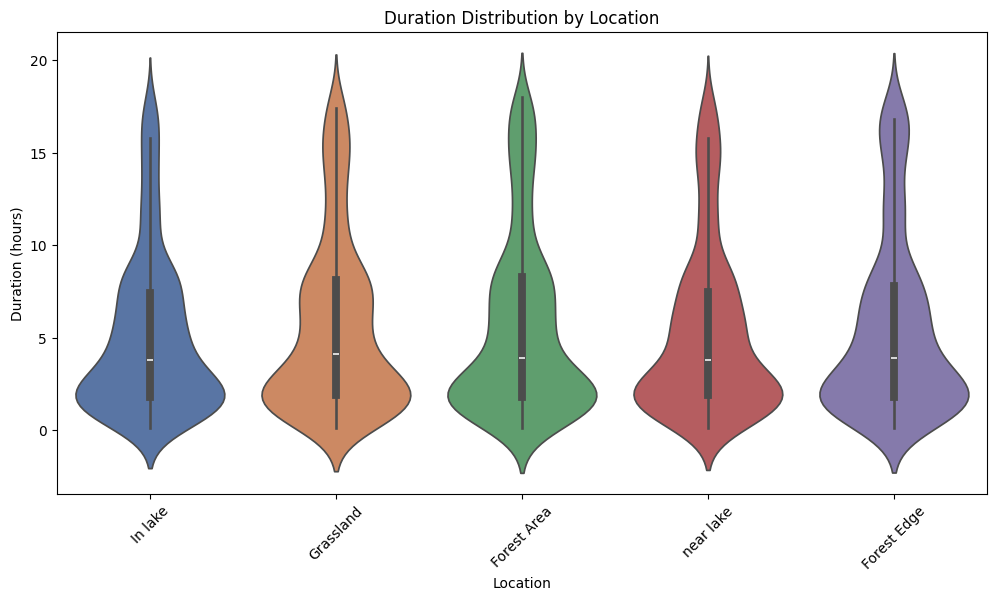

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Location', y='Duration', palette='deep')

# Set the plot title and labels
plt.title('Duration Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Duration (hours)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


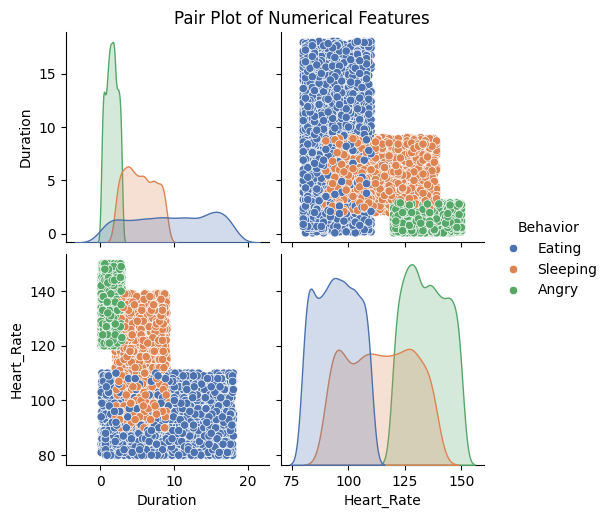

In [ ]:
sns.pairplot(df, hue='Behavior', diag_kind='kde', palette='deep')

# Set the plot title and labels
plt.suptitle('Pair Plot of Numerical Features', y=1.02)

# Show the plot
plt.show()


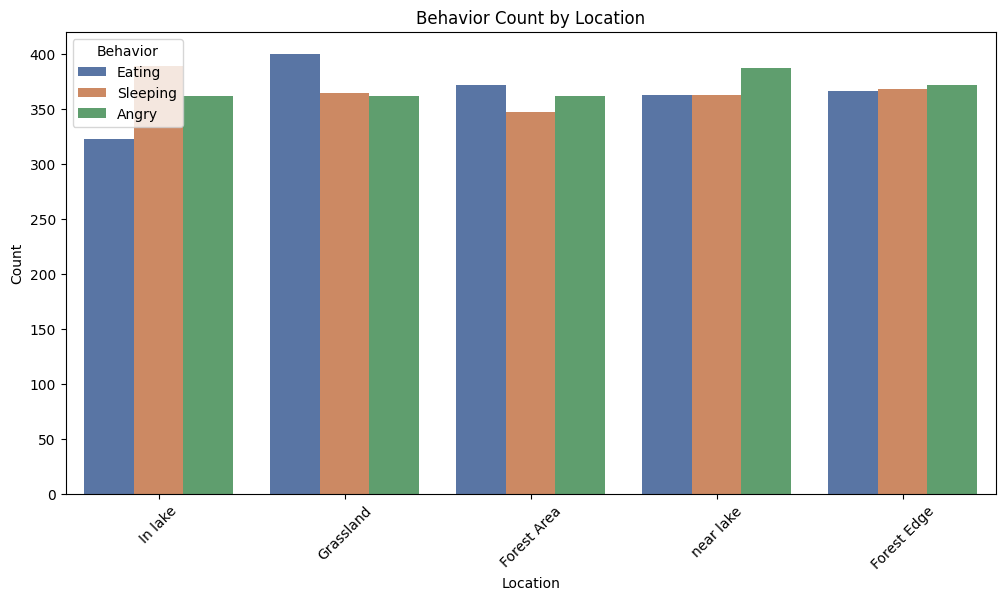

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Location', hue='Behavior', palette='deep')

# Set the plot title and labels
plt.title('Behavior Count by Location')
plt.xlabel('Location')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


<ipython-input-13-35ebea601ec5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Location', y='Heart_Rate', palette='deep')


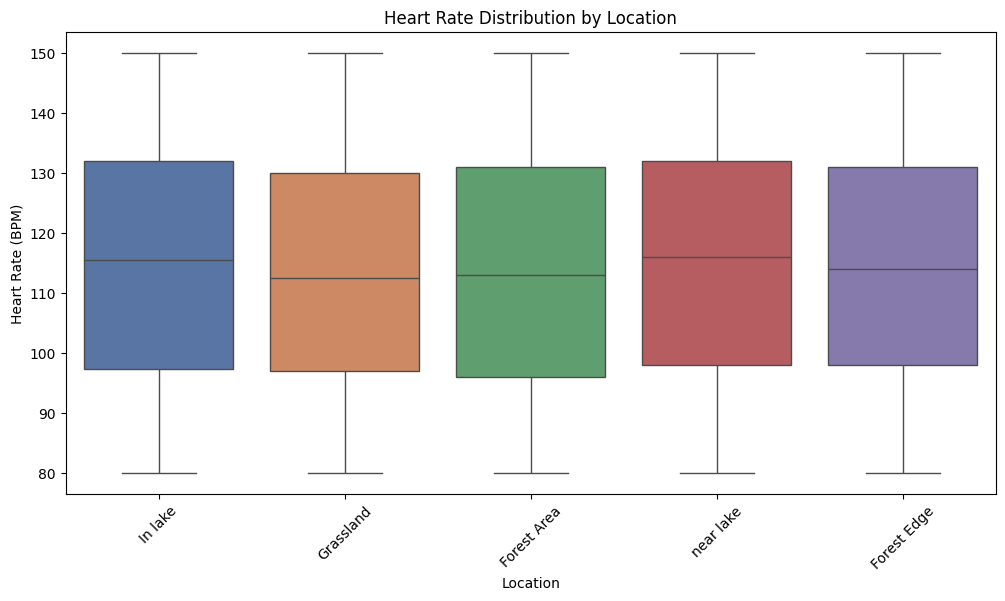

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Location', y='Heart_Rate', palette='deep')

# Set the plot title and labels
plt.title('Heart Rate Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Heart Rate (BPM)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


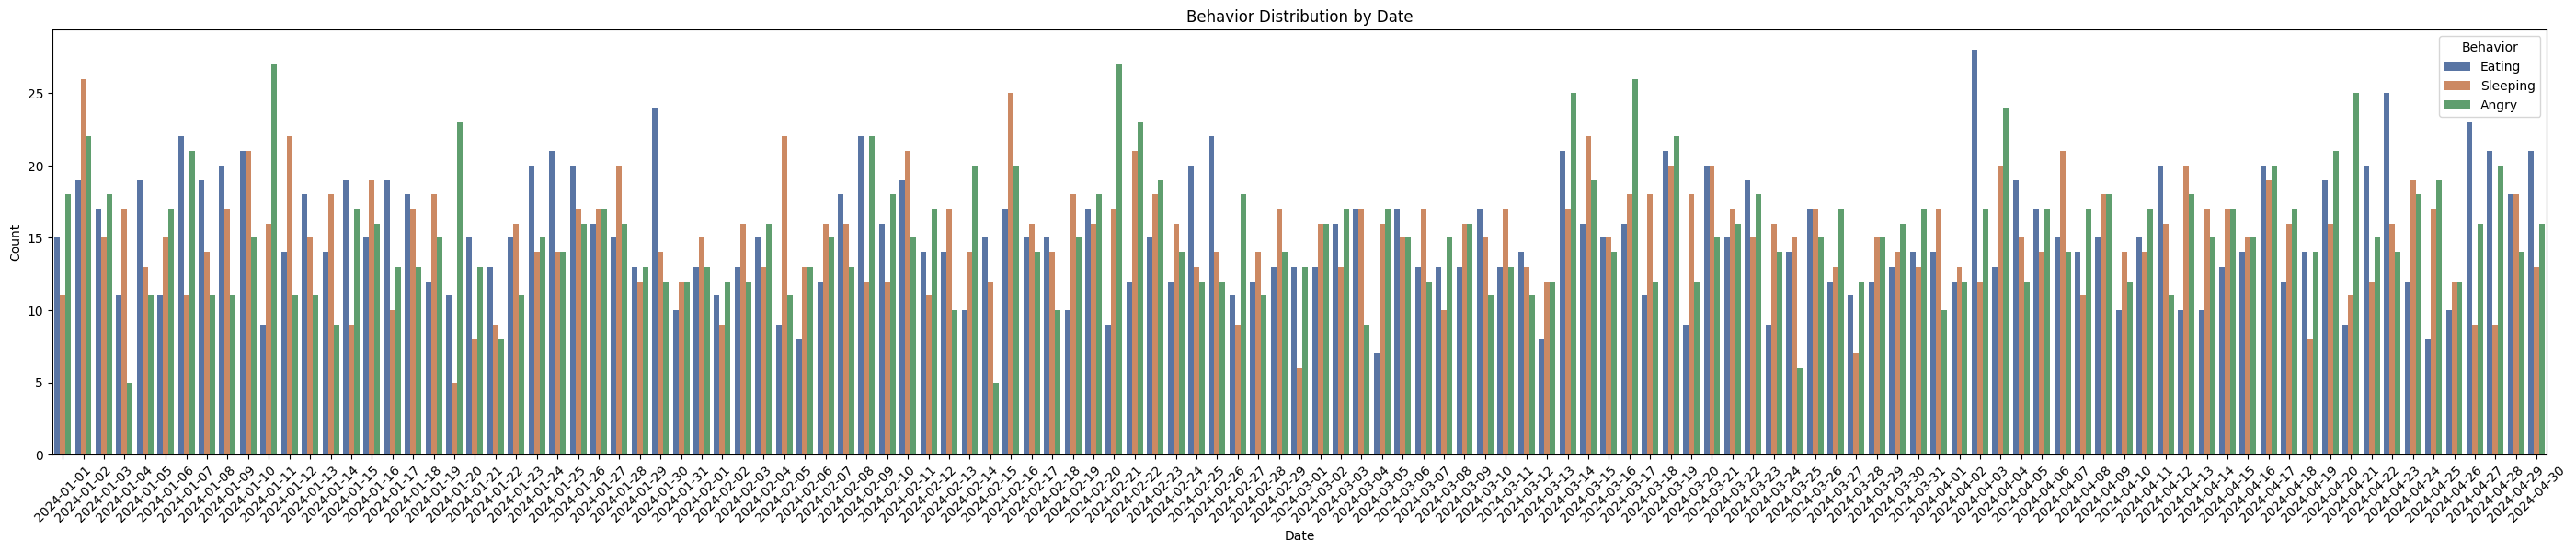

In [ ]:
plt.figure(figsize=(35, 6))
sns.countplot(data=df, x='Date', hue='Behavior', palette='deep')

# Set the plot title and labels
plt.title('Behavior Distribution by Date')
plt.xlabel('Date')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


<ipython-input-16-2bafdf6bcaa4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Food_Type', y='Duration', palette='deep')


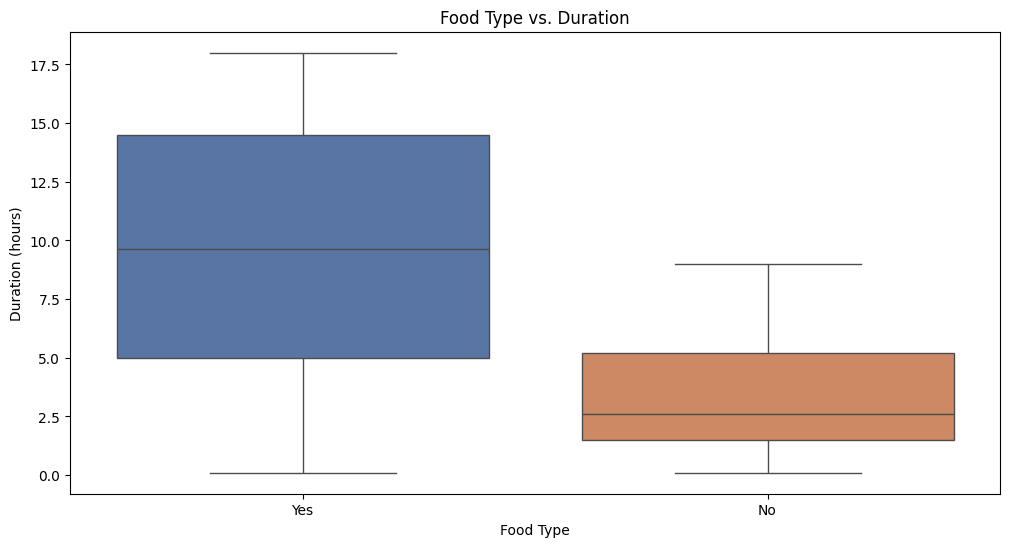

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Food_Type', y='Duration', palette='deep')

# Set the plot title and labels
plt.title('Food Type vs. Duration')
plt.xlabel('Food Type')
plt.ylabel('Duration (hours)')

# Show the plot
plt.show()


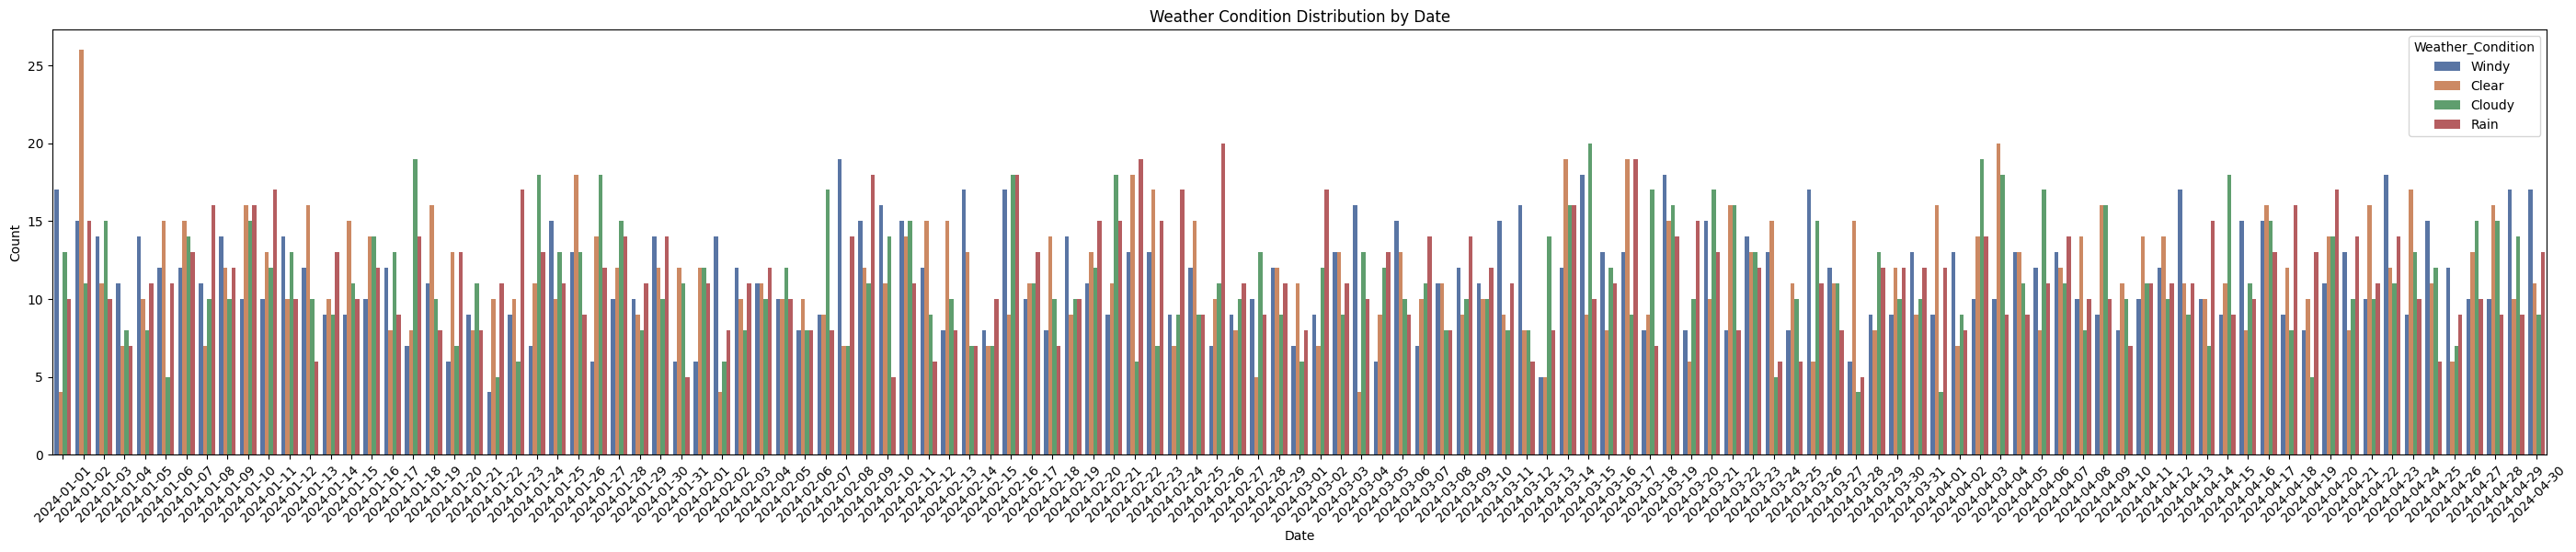

In [ ]:
plt.figure(figsize=(35, 6))
sns.countplot(data=df, x='Date', hue='Weather_Condition', palette='deep')

# Set the plot title and labels
plt.title('Weather Condition Distribution by Date')
plt.xlabel('Date')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()



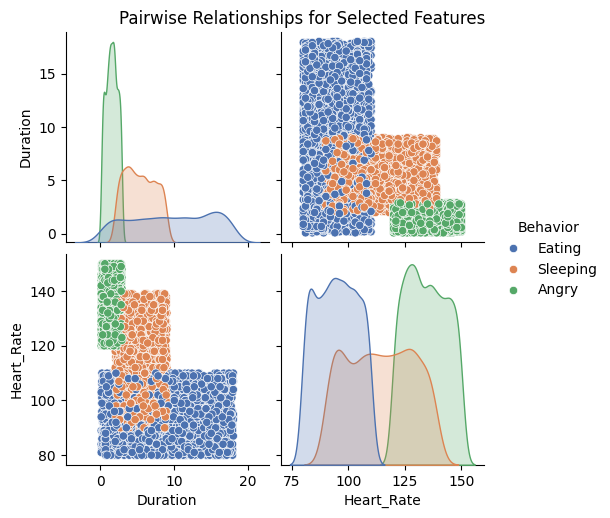

In [ ]:
selected_features = ['Duration', 'Heart_Rate', 'Location', 'Behavior']
sns.pairplot(df[selected_features], hue='Behavior', diag_kind='kde', palette='deep')

# Set the plot title and labels
plt.suptitle('Pairwise Relationships for Selected Features', y=1.02)

# Show the plot
plt.show()


<ipython-input-19-f7e0e99ba3d5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_duration_by_behavior, x='Behavior', y='Duration', palette='deep')


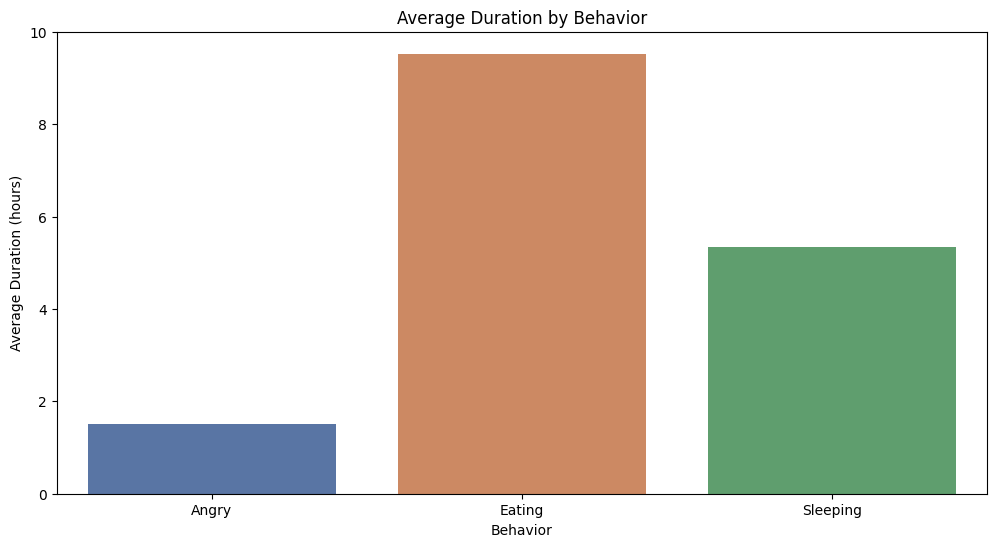

In [ ]:
avg_duration_by_behavior = df.groupby('Behavior')['Duration'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_duration_by_behavior, x='Behavior', y='Duration', palette='deep')

# Set the plot title and labels
plt.title('Average Duration by Behavior')
plt.xlabel('Behavior')
plt.ylabel('Average Duration (hours)')

# Show the plot
plt.show()


<ipython-input-20-7cd27b8c730f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_heart_rate_by_weather, x='Weather_Condition', y='Heart_Rate', palette='deep')


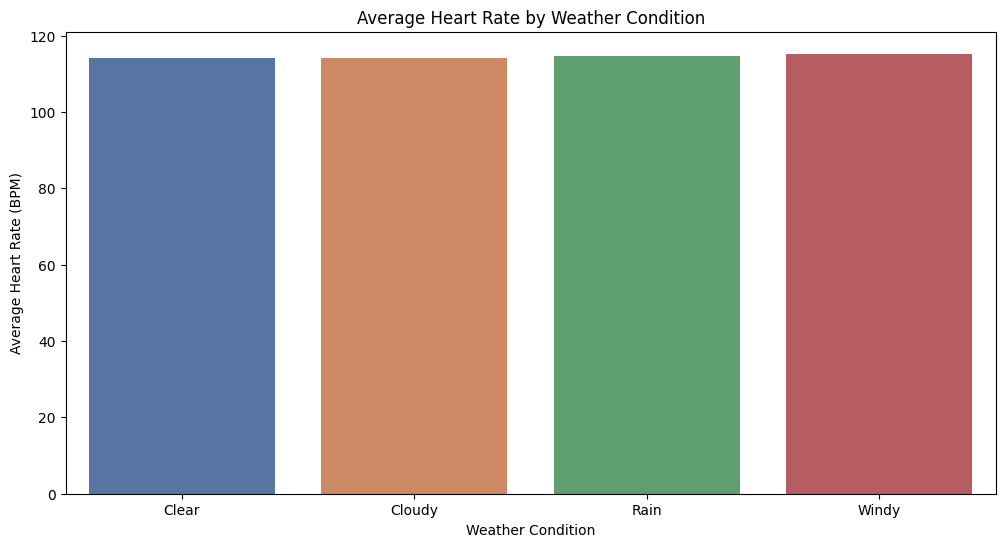

In [ ]:
avg_heart_rate_by_weather = df.groupby('Weather_Condition')['Heart_Rate'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_heart_rate_by_weather, x='Weather_Condition', y='Heart_Rate', palette='deep')

# Set the plot title and labels
plt.title('Average Heart Rate by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Heart Rate (BPM)')

# Show the plot
plt.show()



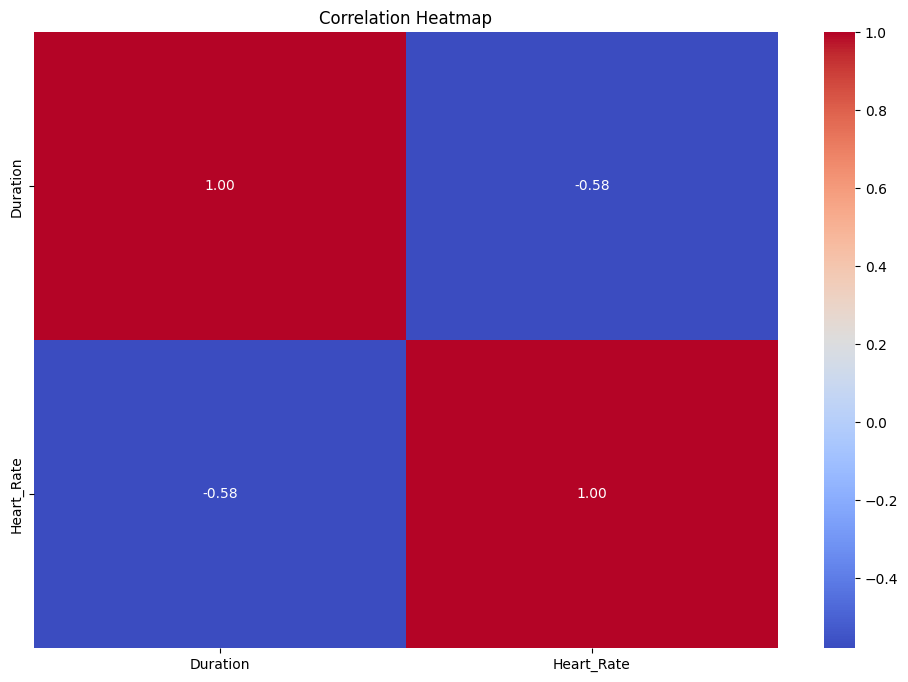

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the correlation matrix only for numeric columns
numeric_cols = df.select_dtypes(include=[np.number])
corr = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

# Set the plot title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()
